### Imports

In [224]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

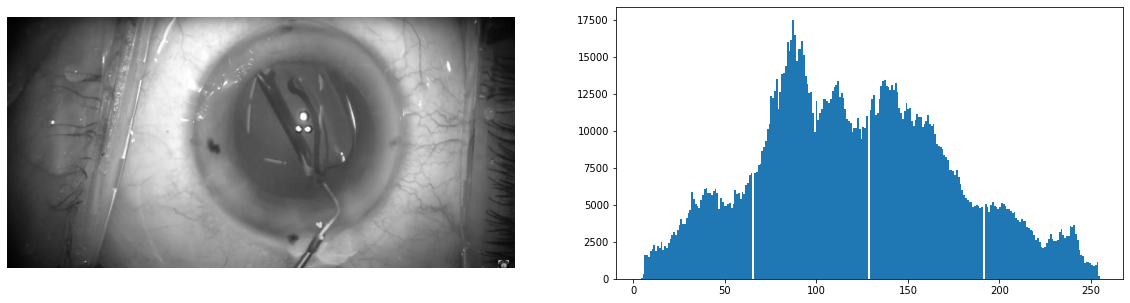

In [477]:
base_gray = cv2.imread('data/real/lens.png', cv2.IMREAD_GRAYSCALE)
base_gray = base_gray[50:-80,:]

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(20,5))
plot1.imshow(base_gray, cmap=plt.cm.gray)
plot1.axis('off')

plot2.hist(base_gray.ravel(), bins=256)

plt.show()

In [478]:
base_small = cv2.resize(base_gray, None, fx=0.25, fy=0.25)

base_small.shape

(238, 480)

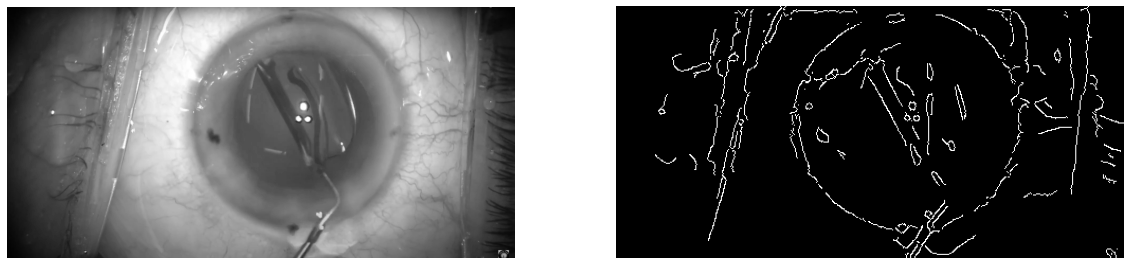

In [479]:
high_tres = 50
low_tres = high_tres//2

# base_canny = cv2.Canny(base_small, low_tres, high_tres)
base_canny = cv2.Canny(cv2.GaussianBlur(base_small, ksize=(0,0), sigmaX=2), low_tres, high_tres)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(20,5))
plot1.imshow(base_gray, cmap=plt.cm.gray)
plot1.axis('off')

plot2.imshow(base_canny, cmap=plt.cm.gray)
plot2.axis('off')

plt.show()

In [480]:
base_for_hough = base_small

circles = cv2.HoughCircles(
    cv2.GaussianBlur(base_for_hough, ksize=(0,0), sigmaX=2),
    cv2.HOUGH_GRADIENT, 1, 1,
    param1=50, param2=30,
    minRadius=base_for_hough.shape[0]//10, maxRadius=base_for_hough.shape[0]//2
)

(1, 36, 3)


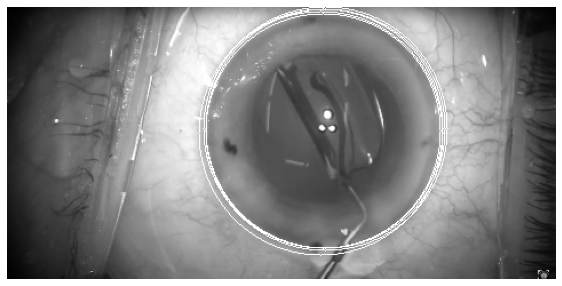

In [481]:
print(circles.shape)
circles_filtered = circles[:,:5,:]

base_circles = base_for_hough.copy()
circles_filtered = np.uint16(np.around(circles_filtered))
for circle in circles_filtered[0,:]:
    cv2.circle(base_circles, (circle[0], circle[1]), circle[2], 255, 1)

fig, plot1 = plt.subplots(1, 1, figsize=(20,5))
plot1.imshow(base_circles, cmap=plt.cm.gray)
plot1.axis('off')

plt.show()

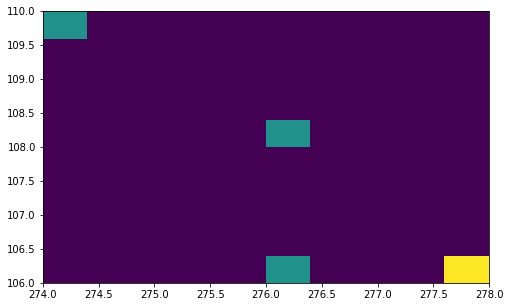

In [482]:
fig, plot1 = plt.subplots(1, 1, figsize=(8,5))
plot1.hist2d(circles_filtered[0,:,0], circles_filtered[0,:,1])

plt.show()

<ipython-input-483-966a0f637f1e>:2: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=n_clusters).fit(circles_filtered[0,:,0:2])


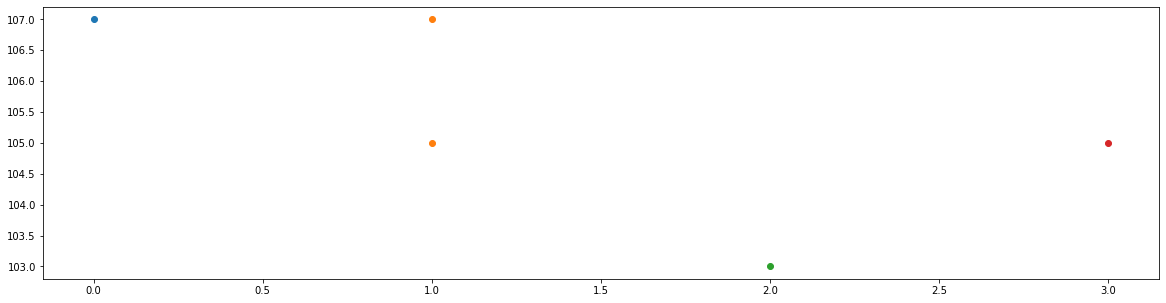

In [483]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters).fit(circles_filtered[0,:,0:2])

fig, plot1 = plt.subplots(1, 1, figsize=(20,5))
for i in range(n_clusters):
    (cluster_indices, ) = np.where(kmeans.labels_ == i)
    plot1.scatter(
        np.array([i]*len(cluster_indices)),
        circles_filtered[0,cluster_indices,2]
    )

plt.show()

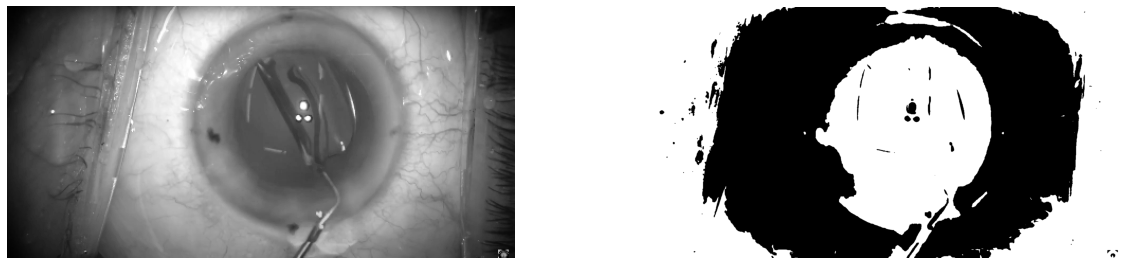

In [486]:
th, base_otsu = cv2.threshold(
    src=cv2.GaussianBlur(base_gray, ksize=(0,0), sigmaX=1),
    thresh=0,
    maxval=255,
    type=cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU
)

fig, (plot1, plot2) = plt.subplots(1, 2, figsize=(20,5))
plot1.imshow(base_small, cmap=plt.cm.gray)
plot1.axis('off')

plot2.imshow(base_otsu, cmap=plt.cm.gray, vmin=0, vmax=255) 
plot2.axis('off')

plt.show()